<a href="https://colab.research.google.com/github/Mithul-Joseph/Pathology-Detection/blob/main/Cardiomegaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



This program aims to detect the presence of a pathology called cardiomegaly in X-rays using machine learning and provide localization for it.

# Pre-processing
This section deals with pre-processing of the model. It includes the following: 

* Cleaning the data.
* Splitting the data.
* Handling patient overlap.



In [ ]:
#importing necessary libraries
import csv
import pandas as pd

In [ ]:
#reading csv file as pandas dataframe
data = pd.read_csv('/content/drive/My Drive/Project/data/Data_Entry_2017_v2020.csv')
print("Data Info :")
data.info()

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


In [ ]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.626365,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.602680,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,0.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,34.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800


In [ ]:
print("\nFew rows from data\n")
data.head()


Few rows from data



,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
column_names = data.keys()
print(column_names)

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')


In [ ]:
#removing unnecessary rows from the dataframe
data = data.drop(['Follow-up #', 'Patient Age', 'Patient Gender', 'View Position', 
                  'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]'], 1)
print("Number of images :",len(data),"\n")
print("Few rows from data")
data.head()

Number of images : 112120 

Few rows from data


,Image Index,Finding Labels,Patient ID
0,00000001_000.png,Cardiomegaly,1
1,00000001_001.png,Cardiomegaly|Emphysema,1
2,00000001_002.png,Cardiomegaly|Effusion,1
3,00000002_000.png,No Finding,2
4,00000003_001.png,Hernia,3


In [ ]:
#making a dataframe for cardiomegaly
cardio_df = data.loc[data['Finding Labels'].str.contains('Cardiomegaly')]
cardio_df = cardio_df.assign(Cardiomegaly = 1)
num_cardio = len(cardio_df)
print("Number of cardiomegaly images :",num_cardio)
cardio_df.head()

Number of cardiomegaly images : 2776


,Image Index,Finding Labels,Patient ID,Cardiomegaly
0,00000001_000.png,Cardiomegaly,1,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,1
2,00000001_002.png,Cardiomegaly|Effusion,1,1
23,00000008_000.png,Cardiomegaly,8,1
41,00000013_025.png,Cardiomegaly|Infiltration|Mass|Nodule,13,1


In [ ]:
#making a dataframe for 'no finding'
no_finding_df = data.loc[data['Finding Labels'] == 'No Finding']
no_finding_df = no_finding_df.sample(n = num_cardio, random_state = 30)
no_finding_df = no_finding_df.assign(Cardiomegaly = 0)
no_finding_df.head()

,Image Index,Finding Labels,Patient ID,Cardiomegaly
71247,00017558_000.png,No Finding,17558,0
101781,00027063_000.png,No Finding,27063,0
18480,00004910_000.png,No Finding,4910,0
105503,00028357_029.png,No Finding,28357,0
38974,00010198_007.png,No Finding,10198,0


In [ ]:
# combining both dataframe
combined_df = pd.concat([cardio_df, no_finding_df])
print("number of combined images :",len(combined_df))

#shuffling the images
combined_df = combined_df.sample(frac=1, random_state=30).reset_index(drop = True)
# print("number of combined images after shuffling:",len(combined_df))
print("\nFew rows from data")
combined_df.head()

number of combined images : 5552

Few rows from data


,Image Index,Finding Labels,Patient ID,Cardiomegaly
0,00026715_002.png,Cardiomegaly|Effusion|Emphysema|Infiltration,26715,1
1,00025694_002.png,No Finding,25694,0
2,00020181_000.png,Cardiomegaly,20181,1
3,00017138_021.png,Cardiomegaly|Consolidation|Effusion,17138,1
4,00002524_002.png,No Finding,2524,0


Splitting the data

In [ ]:
# splitting data into train(70%), test(20%) and validation data(10%)
split_data = combined_df.sample(frac=0.8, random_state=30)
test_data = combined_df.drop(split_data.index)
train_data = split_data.sample(frac=0.9, random_state=30)
valid_data = split_data.drop(train_data.index)
print("Number of images in ")
print("train_data :",len(train_data))
print("valid_data :",len(valid_data))
print("test_data :",len(test_data))
print("Total :",len(test_data)+len(train_data)+len(valid_data))

Number of images in 
train_data : 3998
valid_data : 444
test_data : 1110
Total : 5552


Handling patient overlap

In [ ]:
#checking for data leakage or patient overlap
def patient_overlap(dataframe1, dataframe2):
    unique_patients_1 = set(dataframe1['Patient ID'])
    print("Number of unique patients in dataframe 1 :",len(unique_patients_1))
    unique_patients_2 = set(dataframe2['Patient ID'])
    print("Number of unique patients in dataframe 2 :",len(unique_patients_2))

    common_patients = list(unique_patients_1.intersection(unique_patients_2))    

    if common_patients:
        print("Number of patients overlapping :", len(common_patients))
        return common_patients
    else:
        print("No patient_overlap found.")
        return False

In [ ]:
common1 = patient_overlap(train_data, valid_data)
#removing patient overlap if any in train and valid data
if common1:
    indices = []
    for i in range(len(common1)):
        indices.extend(train_data.index[train_data['Patient ID']==common1[i]]) 
        #because append function adds list as an element of the list and 
        #extend function adds them as elements of list
    print("Removing common patients")
    train_data.drop(indices, inplace=True)
    common =  patient_overlap(train_data, valid_data)

Number of unique patients in dataframe 1 : 2911
Number of unique patients in dataframe 2 : 405
Number of patients overlapping : 135
Removing common patients
Number of unique patients in dataframe 1 : 2776
Number of unique patients in dataframe 2 : 405
No patient_overlap found.


In [ ]:
common2 = patient_overlap(valid_data, test_data)
#removing patient overlap if any in test and valid data
if common2:
    indices = []
    for i in range(len(common2)):
        indices.extend(test_data.index[test_data['Patient ID']==common2[i]]) 
    print("Removing common patients")
    test_data.drop(indices, inplace=True)
    common =  patient_overlap(valid_data, test_data)

Number of unique patients in dataframe 1 : 405
Number of unique patients in dataframe 2 : 957
Number of patients overlapping : 71
Removing common patients
Number of unique patients in dataframe 1 : 405
Number of unique patients in dataframe 2 : 886
No patient_overlap found.


In [ ]:
common3 = patient_overlap(train_data, test_data)
#removing patient overlap if any in train and test data
if common3:
    indices = []
    for i in range(len(common3)):
        indices.extend(train_data.index[train_data['Patient ID']==common3[i]]) 
    print("Removing common patients")
    train_data.drop(indices, inplace=True)
    common =  patient_overlap(train_data, test_data)

Number of unique patients in dataframe 1 : 2776
Number of unique patients in dataframe 2 : 886
Number of patients overlapping : 263
Removing common patients
Number of unique patients in dataframe 1 : 2513
Number of unique patients in dataframe 2 : 886
No patient_overlap found.


In [ ]:
print("Number of images in training data :",len(train_data))
print("Number of images in test data :",len(test_data))
print("Number of images in validation data :",len(valid_data))

Number of images in training data : 2930
Number of images in test data : 964
Number of images in validation data : 444


In [ ]:
# writing the data to csv file
train_data.to_csv(path_or_buf='/content/drive/My Drive/Project/data/train.csv',index=False)
valid_data.to_csv(path_or_buf='/content/drive/My Drive/Project/data/valid.csv',index=False)
test_data.to_csv(path_or_buf='/content/drive/My Drive/Project/data/test.csv',index=False)

# Input for the model
This section includes the following:

* Creation of generators for training, validation and test set.
* Normalising the data.
* Defining the weighted cross entropy loss function.



In [ ]:
# importing the necessary libraries
import tensorflow as tf
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import keras.backend as K
import matplotlib.pyplot as plt
import datetime
import time 
import os
import numpy as np
from csv import writer

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.python.keras.layers.pooling import GlobalMaxPooling2D

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import DenseNet201

In [ ]:
def reset_session():
    sess = K.get_session()
    K.clear_session()
    sess.close()
    sess = K.get_session()

reset_session()

# getting the start time
start_time = time.time()

In [ ]:
# reading the data
train_data = pd.read_csv('/content/drive/My Drive/Project/data/train.csv')
valid_data = pd.read_csv('/content/drive/My Drive/Project/data/valid.csv')
test_data = pd.read_csv('/content/drive/My Drive/Project/data/test.csv')

image_path = '/content/drive/My Drive/Project/dataset/images_1/'

pathologies = ['Cardiomegaly']

model_dict = {'densenet121':DenseNet121, 
              'densenet169':DenseNet169, 
              'densenet201':DenseNet201}

model_name = 'densenet169'
expt = 'expt_1'
pooling = 'max'
loss = 'W-CEL'

batch_size = 16
target_height = 256
target_width = 256

ckpt_path = '/content/drive/My Drive/Project/model_checkpoint/' + model_name + '/' + expt + '/'
result_dir = '/content/drive/My Drive/Project/results/' + model_name + '/' + expt + '/'
history_csv_name = '/content/drive/My Drive/Project/history/history_' + model_name + '_' + expt + '.csv'
expt_csv = '/content/drive/My Drive/Project/trained/expt_results.csv'

Data augmentation using generators
 - normalization
 - rotation
 - batches

In [ ]:
# creating generators for training, testing and validation
generator_train = ImageDataGenerator(samplewise_center = True,
                                     samplewise_std_normalization = True,
                                     rotation_range = 5)

train_generator = generator_train.flow_from_dataframe(dataframe=train_data, 
                                                      directory=image_path, 
                                                      x_col='Image Index', 
                                                      y_col=pathologies, 
                                                      class_mode='raw',
                                                      shuffle = True, 
                                                      batch_size = batch_size,
                                                      target_size = (target_height, 
                                                                     target_width))

val_test_gen = ImageDataGenerator().flow_from_dataframe(dataframe = train_data,
                                                        directory = image_path,
                                                        x_col = "Image Index",
                                                        y_col = pathologies,
                                                        class_mode = "raw",
                                                        shuffle = True,
                                                        batch_size = batch_size,
                                                        target_size = (target_height, 
                                                                       target_width))
sample = val_test_gen.next()
sample1 = sample[0]

gen_val_test = ImageDataGenerator(featurewise_center = True,
                             featurewise_std_normalization = True,
                             rotation_range = 5)
gen_val_test.fit(sample1)

valid_generator = gen_val_test.flow_from_dataframe(dataframe = valid_data, 
                                              directory = image_path, 
                                              x_col = 'Image Index', 
                                              y_col = pathologies, 
                                              class_mode = 'raw', 
                                              target_size = (target_height, 
                                                             target_width), 
                                              batch_size = batch_size,
                                              shuffle = False)

test_generator = gen_val_test.flow_from_dataframe(dataframe = test_data, 
                                             directory = image_path, 
                                             x_col = 'Image Index', 
                                             y_col = pathologies, 
                                             class_mode = 'raw', 
                                             target_size = (target_height, 
                                                            target_width), 
                                             batch_size = batch_size,
                                             shuffle = False)



Found 2930 validated image filenames.
Found 2930 validated image filenames.
Found 444 validated image filenames.
Found 964 validated image filenames.


Defining Weighted Cross Entropy loss function

In [ ]:
# Weighted cross entropy loss

pos_labels = sum(train_generator.labels)
w_neg = np.array([int(pos_labels)/train_generator.n])
neg_labels = train_generator.n - int(pos_labels)
w_pos = np.array([int(neg_labels)/train_generator.n])

def loss_function(y_true, y_pred):
   
    loss = 0.0
    epsilon = 1e-5

    for i in range(len(pathologies)):
        loss += -1*(K.mean(w_pos[i]*tf.cast(y_true[:, i],dtype=tf.float32)*K.log(epsilon + tf.cast(y_pred[:, i],dtype=tf.float32)))
        + K.mean(w_neg[i]*tf.cast(1-y_true[:,i],dtype=tf.float32)*K.log(epsilon + tf.cast(1-y_pred[:,i],dtype=tf.float32))))
    return loss


# Model
This section includes the following:
* Using different callbacks.
* Building the model.
* Training the model.


In [ ]:
# # if model: del model

def build_model(model_name, train_base_model = True):

    base_model = model_dict[model_name](include_top = False, weights = 'imagenet')
    
    if train_base_model:
        for layer in base_model.layers:
            layer.trainable = True
        
    else:
        #freezing the base model layers
        for layer in base_model.layers:
            layer.trainable = False
    
    #adding additional layers
    add_layer = base_model.output
    # add_layer = GlobalAveragePooling2D()(add_layer)
    add_layer = GlobalMaxPooling2D()(add_layer)

    #prediction layer
    pred_layer = Dense(1, activation='sigmoid')(add_layer)

    model = Model(base_model.input, pred_layer)
    
    return model

In [ ]:
# callbacks

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath = ckpt_path + datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + 'weights.{epoch:02d}.h5', monitor='val_loss')

best_ckpt = tf.keras.callbacks.ModelCheckpoint(filepath = ckpt_path + 'best/' + 'best_epoch_{epoch:02d}.h5', monitor='val_loss', verbose=0, save_best_only=True)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, mode='auto')

reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

# history_csv_name = 'F:/Dataset/trained/history/history_' + model_name + '.csv'

log_history = tf.keras.callbacks.CSVLogger(history_csv_name, separator=",", append=True)

# log_dir = 'F:/Dataset/trained/log/' + model_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# callback_tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# callbacks = [ckpt_callback, best_ckpt, reduce_lr_callback, early_stop_callback, callback_tensorboard]

callbacks = [ckpt_callback, best_ckpt, reduce_lr_callback, early_stop_callback, log_history]


In [ ]:
# checking for previous checkpoints

def get_initial_epoch_and_latest(ckpt_path):
    latest = max(os.listdir(ckpt_path))
    # print("latest :", latest)
    # print(latest.split(".")[1])
    initial_epoch = int(latest.split(".")[1])
    return initial_epoch, latest

if os.path.isdir(ckpt_path):
    if len(os.listdir(ckpt_path))>0:
        print('Restoring from previous checkpoint.')
        initial_epoch, latest = get_initial_epoch_and_latest(ckpt_path)
        model = tf.keras.models.load_model(ckpt_path + latest)
    
    else:
        print('There are no previous checkpoints.')
        model = build_model(model_name)
        initial_epoch = 0

else:
    print('There are no previous checkpoints.')
    model = build_model(model_name)
    initial_epoch = 0

There are no previous checkpoints.
51888128/51877672 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer = 'Adam',
              loss = loss_function,
            #   loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# training the model
history = model.fit(train_generator, epochs = 100, 
                    steps_per_epoch=len(train_generator), 
                    validation_data = valid_generator,
                    validation_steps=len(valid_generator),
                    callbacks = callbacks,
                    initial_epoch = initial_epoch)

Epoch 1/100
184/184 [==============================] - 869s 4s/step - loss: 0.5366 - accuracy: 0.6662 - val_loss: 0.4682 - val_accuracy: 0.7072
Epoch 2/100
184/184 [==============================] - 147s 798ms/step - loss: 0.3223 - accuracy: 0.7198 - val_loss: 0.4665 - val_accuracy: 0.6667
Epoch 3/100
184/184 [==============================] - 147s 795ms/step - loss: 0.2837 - accuracy: 0.7307 - val_loss: 0.2538 - val_accuracy: 0.7905
Epoch 4/100
184/184 [==============================] - 151s 820ms/step - loss: 0.2521 - accuracy: 0.7587 - val_loss: 0.3927 - val_accuracy: 0.7477
Epoch 5/100
184/184 [==============================] - 145s 783ms/step - loss: 0.2127 - accuracy: 0.8017 - val_loss: 0.2412 - val_accuracy: 0.7523
Epoch 6/100
184/184 [==============================] - 147s 799ms/step - loss: 0.2619 - accuracy: 0.7549 - val_loss: 1.1065 - val_accuracy: 0.5135
Epoch 7/100
184/184 [==============================] - 145s 787ms/step - loss: 0.2346 - accuracy: 0.7754 - val_loss: 0.19

# Evaluation of the model
This section is used for the evaluation of the model and includes the following:

*   Computing the AUROC for the model.
*   Plotting the learning curves.



In [ ]:
pred = model.predict(test_generator, steps=len(test_generator))

#calculating the AUROC score
m_auc = roc_auc_score(test_generator.labels, pred, multi_class='ovr')
print('ROC AUC=%.3f' % (m_auc))

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
# print("Time taken for training:",(time.time()-start_time)/3600)


ROC AUC=0.897


In [ ]:
# saving the experiment to a csv file

def save_expt():

    variables = [model_name, (time.time()-start_time)/3600, pooling, loss, m_auc, expt, batch_size, target_height]
    with open(expt_csv, 'a+', newline='') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(variables)

save_expt()

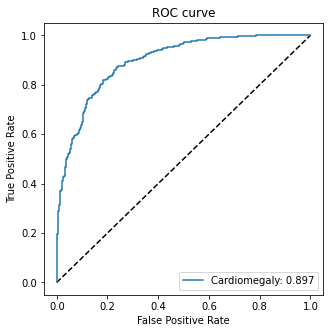

In [ ]:
#function for plotting ROC curve

def aucroc_curve():
    # auc_score = []
    for i in range(len(pathologies)):
        gen_lab = test_generator.labels[:, i]
        preds = pred[:, i]
        auc_roc = roc_auc_score(gen_lab, preds)
        #calculating True Positive Rate (TPR) and False Positive Rate (FPR)
        fpr, tpr, _ = roc_curve(gen_lab, preds)
        plt.figure(1, figsize=(5, 5))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label=pathologies[i] + ": " + str(round(auc_roc, 3)))
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='best')
        plt.legend()
        plt.savefig('{}{}_roc.png'.format(result_dir,model_name))
        
aucroc_curve()

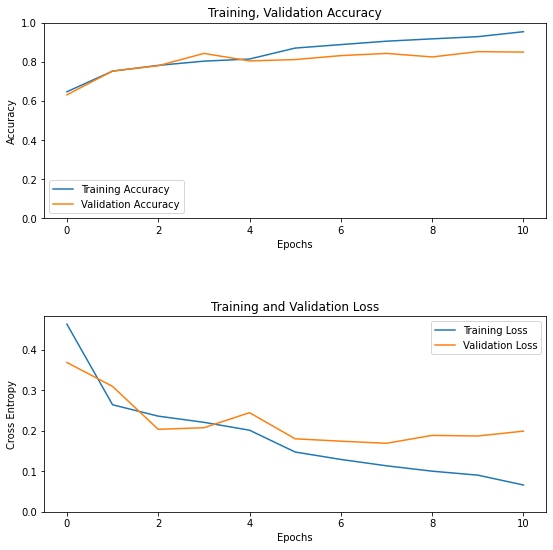

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/Project/history/history_densenet121_expt_4.csv')

def plot_learning_curve():
    acc = data['accuracy']
    val_acc = data['val_accuracy']

    loss = data['loss']
    val_loss = data['val_loss']

    fig = plt.figure(figsize=(9, 9))
    fig.subplots_adjust(hspace = 0.5)
    plt.subplot(2, 1, 1)
    plt.title('Training, Validation Accuracy')
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='best')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    # plt.ylim([min(plt.ylim()),1])
    plt.ylim([0,1])

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.title('Training and Validation Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='best')
    plt.ylabel('Cross Entropy')
    plt.ylim([0, max(plt.ylim())])
    plt.xlabel('Epochs')
    # plt.savefig('{}{}_acc.png'.format(result_dir,model_name))
    plt.show()

plot_learning_curve()

Experiments using different structures of DenseNet

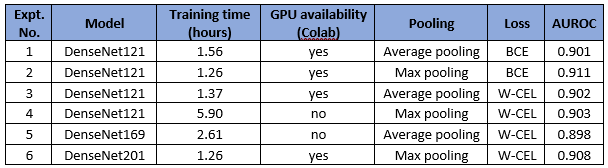

Increasing the depth of the network need not always result in an increased performance of the model.

# Explainable Artificial Intelligence (XAI)

This section deals with providing a visual explanation for the predictions of the model using Grad-CAMs.

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from keras_preprocessing.image import ImageDataGenerator

train_data = pd.read_csv('/content/drive/My Drive/Project/data/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Project/data/test.csv')
img_dir = '/content/drive/My Drive/Project/dataset/images_1/'
ckpt_path = '/content/drive/My Drive/Project/model_checkpoint/'
latest = max(os.listdir(ckpt_path))
print(latest)

pathologies = ['Cardiomegaly']
batch_size = 32
target_height = 256
target_width = 256

# cardiomegaly
img_name = '00026715_002.png'

img_path = img_dir + img_name

expt_09_best_epoch_03.h5


In [ ]:
new_model = tf.keras.models.load_model(ckpt_path+latest)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
raw = ImageDataGenerator().flow_from_dataframe(dataframe=train_data,
                                               directory=img_dir,
                                               x_col="Image Index",
                                               y_col=pathologies,
                                               class_mode="raw",
                                               batch_size=batch_size,
                                               shuffle=False,
                                               target_size=(target_height, 
                                                            target_width))
sample = raw.next()
sample1 = sample[0]

Found 2930 validated image filenames.


In [ ]:
img_gen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization = True)
img_gen.fit(sample1)
# img_gen.fit(raw)
# print(len(img_gen))

In [ ]:
test_generator = img_gen.flow_from_dataframe(dataframe=test_data, 
                                             directory=img_dir, 
                                             x_col='Image Index', 
                                             y_col=pathologies, 
                                             class_mode='raw', 
                                             target_size=(target_height, 
                                                          target_width), 
                                             batch_size=batch_size,
                                             shuffle=False)

Found 964 validated image filenames.


In [ ]:
pred = new_model.predict(test_generator, steps=len(test_generator))

In [ ]:
loss, acc = new_model.evaluate(test_generator, verbose=2)
# loss, acc = new_model.evaluate(test_generator,steps=len(test_generator), verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

31/31 - 22s - loss: 0.6324 - accuracy: 0.7044
Restored model, accuracy: 70.44%


In [ ]:
def read_image(img_path, target_height = 256, target_width = 256):
    image = tf.keras.preprocessing.image.load_img(path = img_path, 
                                              grayscale=False, 
                                              color_mode='rgb', 
                                              target_size=(target_height, 
                                                           target_width, 
                                                           3),
                                              interpolation='nearest')
    return image

<class 'PIL.Image.Image'>


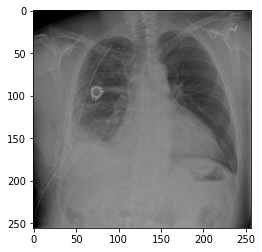

In [ ]:
x = read_image(img_path, target_height, target_width)
print(type(x))
plt.imshow(x)

im = tf.keras.utils.img_to_array(
    x, data_format=None, dtype=None
)

sample_mean = 129.95998
sample_std = 65.590126

im = np.expand_dims(im, axis=0)

im-=sample_mean
im/=sample_std

In [ ]:
n = new_model.output
print(n)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")


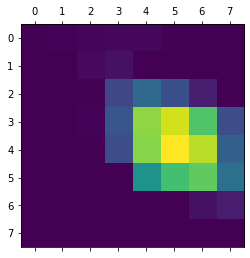

In [ ]:
pred_index = None
last_conv_layer_name = 'conv5_block32_concat'
grad_model = tf.keras.models.Model(
    [new_model.inputs], [new_model.get_layer(last_conv_layer_name).output, new_model.output]
)

# Gradient of the top predicted class with the activations of the last conv layer 
# is calculated here
with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(im)
    if pred_index is None:
        pred_index = tf.argmax(preds[0])
    class_channel = preds[:, pred_index]

grads = tape.gradient(class_channel, last_conv_layer_output)

# Calculating the mean intensity of the gradient over a specific feature map 
# channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Each channel is multiplied with top predicted class then summed to obtain the 
# class activation heatmap
last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# For visualization purpose, the heatmap is normalised between 0 & 1
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap.numpy()

import matplotlib.pyplot as plt

plt.matshow(heatmap)
plt.show()

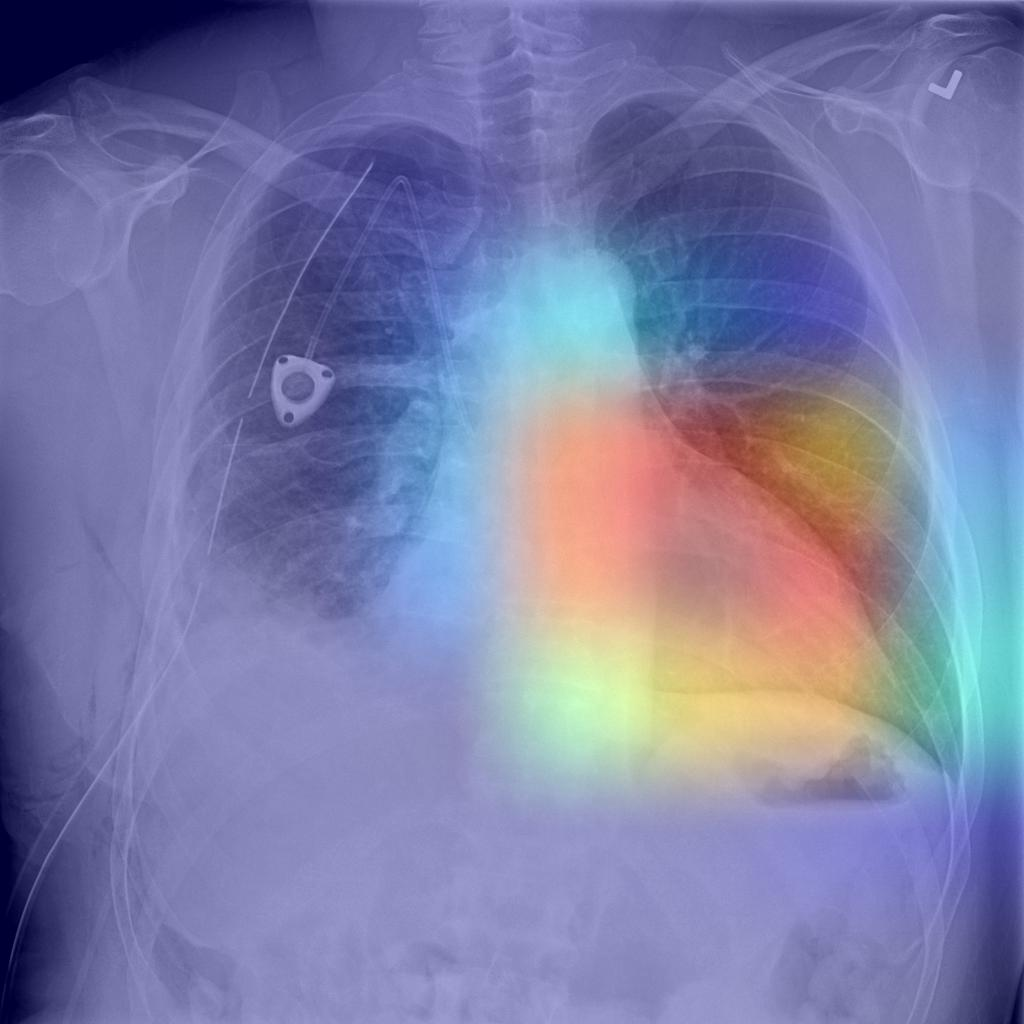

In [ ]:
import matplotlib.cm as cm
from IPython.display import Image, display

def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):

    img = keras.preprocessing.image.load_img(img)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescaling the heatmap to a range of 0-255
    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimposing the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

### Limitations of the model
*   Images were downsampled.
*   Higher GPU memory.


### Future Works


*   Expanding to more pathologies.
*   Include additional data.

